In [3]:
# Load required packages
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
boston = load_boston()

In [4]:
housing = datasets.load_boston() # load Boston housing dataset

In [5]:
print(housing.keys())

['data', 'feature_names', 'DESCR', 'target']


In [6]:
housing.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='|S7')

In [8]:
#
boston = pd.DataFrame(housing.data,columns=housing.feature_names)
print(boston.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


## Creating feature and target arrays

In [11]:
X = boston.values  #  
y = housing.target # Meadian housing values is the target

## Predicting house value from a single feature

In [12]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [13]:
y = y.reshape(-1, 1)
X_rooms = X_rooms.reshape(-1, 1)

### Plotting house value vs. number of rooms

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


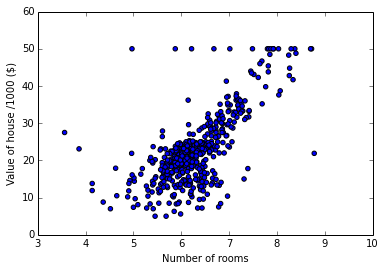

In [14]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of house /1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

## Fitting a regression model

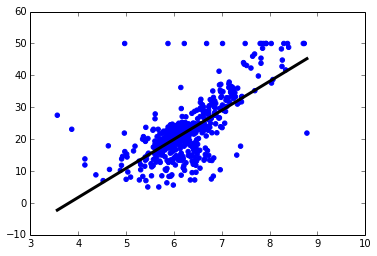

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression() # instanciate model
reg.fit(X_rooms, y) # fit the model with the data
prediction_space = np.linspace(min(X_rooms),max(X_rooms)).reshape(-1, 1)
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color='black', linewidth=3)
plt.show()

## Regression mechanics
* We are trying to fit y = ax + b
    * y = target
    * x = single feature
    * a, b = parameters of model

* How do we choose a and b?
* Define an error function for any given line
    * Choose the line that minimizes the error function
    
* Loss function-> Ordinary least squares (OLS): Minimize sum of squares of residuals

### Linear regression in higher dimensions

$$ y = a_1 x_1 + a_2 x_2 + b $$

* To fit a linear regression model here:
    * Need to specify 3 variables

* In higher dimensions:
    $ y = a_1 x_1 + a_2 x_2 + a_3 x_3 + a_n x_n + b$
    * Must specify coefficient for each feature and the variable b
    
* Scikit-learn API works exactly the same way:
    * Pass two arrays: Features, and target

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
reg_all = linear_model.LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test) # the score here is given by r^2

0.71092035863262604

## Cross-validation motivation
* Model performance is dependent on way the data is split
* Not representative of the model’s ability to generalize
* Solution: Cross-validation!

    - 5 folds = 5-fold CV
    - 10 folds = 10-fold CV
    - k folds = k-fold CV
    - More folds = More computationally expensive

In [17]:
from sklearn.model_selection import cross_val_score
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5) # cv cross validation scores
print(cv_results)

[ 0.63861069  0.71334432  0.58645134  0.07842495 -0.26312455]


In [18]:
np.mean(cv_results)

0.35074135093253134

## Regularized Regression

* Recall: Linear regression minimizes a loss function
* It chooses a coefficient for each feature variable
* Large coefficients can lead to overfi ing
* Penalizing large coefficients: Regularization

### Ridge regressionn
* Loss function = OLS loss function $+\alpha *\sum_{i=1}^{n} a_i^2$
* Alpha: Parameter we need to choose
* Picking alpha here is similar to picking k in k-NN
* Hyperparameter tuning
* Alpha controls model complexity
    * Alpha = 0: We get back OLS (Can lead to overfitting)
    * Very high alpha: Can lead to underfitting

In [19]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
ridge = Ridge(alpha=0.1, normalize=True) # normalized all columns
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test, y_test)

0.69955650271004166

## Lasso Regression

Loss function = OLS loss function $+\alpha *\sum_{i=1}^{n} |a_i|$

In [20]:
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

0.59502292925878275

### Lasso regression for feature selection
* Can be used to select important features of a dataset
* Shrinks the coefficients of less important features to exactly 0

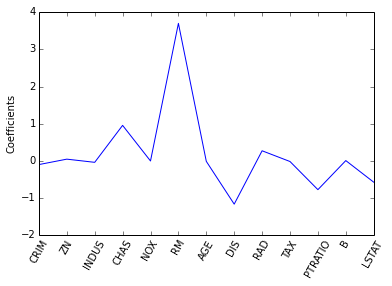

In [21]:
from sklearn.linear_model import Lasso
names = boston.columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

In [22]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()